In [36]:
# run this cell - obligatory imports in every file
from datascience import *
import pandas as pd
from pandas import read_stata
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [37]:
!curl -LJO  https://github.com/data-8/ls88-btc/raw/master/lab6/WGP_3rounds_Data8.dta

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7570k  100 7570k    0     0  6765k      0  0:00:01  0:00:01 --:--:-- 44.0M


In [38]:
WGP3rds_df = pd.DataFrame(pd.read_stata('WGP_3rounds_Data8.dta'))
WGP3rds_table= Table.from_df(WGP3rds_df)
#WGP_df.head(10)

In [39]:
WGPRd2 = WGP3rds_table.where("round",2).select("a1_cmpd_id",'treatment_arm','Selfrptpct', 'Vldclpct')
WGPRd2

a1_cmpd_id,treatment_arm,Selfrptpct,Vldclpct
515520,1,0,0
511903,1,0,0
501212,1,0,0
518908,1,0,0
511914,1,0,0
507017,1,0,0
508517,1,0,0
500436,1,100,100
501216,1,0,0
516119,1,0,0


In [40]:
# Lets group by treatment_arm take the means of each group
# This corresponds to the summary stats in Lab 5
round2_means = WGPRd2.group('treatment_arm', np.mean)
round2_means

treatment_arm,a1_cmpd_id mean,Selfrptpct mean,Vldclpct mean
1,508712,5.91716,3.5503
2,509444,13.1313,5.05051
3,469899,18,10.6667
4,470342,16.0377,12.2642
5,490193,58.7349,40.9639
6,443467,57.8652,38.2022
7,508978,67.4667,37.8667


In [43]:
round2_stdev = WGPRd2.group('treatment_arm', np.std)
round2_num= WGPRd2.group('treatment_arm')
round2_self_stdev_array= round2_stdev.column('Selfrptpct std')
round2_self_num_array = round2_num.column('count')
round2_self_sqrtn_array = np.sqrt(round2_self_num_array)
round2_self_se=np.divide(round2_self_stdev_array,round2_self_sqrtn_array)
round2_self_2se = round2_self_se*2
round2_means_self_array = round2_means.column('Selfrptpct mean')
round2_means_vld_array = round2_means.column('Vldclpct mean')

/Users/ericvandusen/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/datascience/tables.py:3647: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(tick_labels, stretch='ultra-condensed')


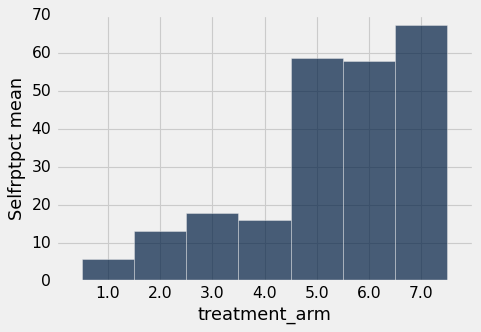

In [42]:
round2_means.bar('treatment_arm','Selfrptpct mean') 

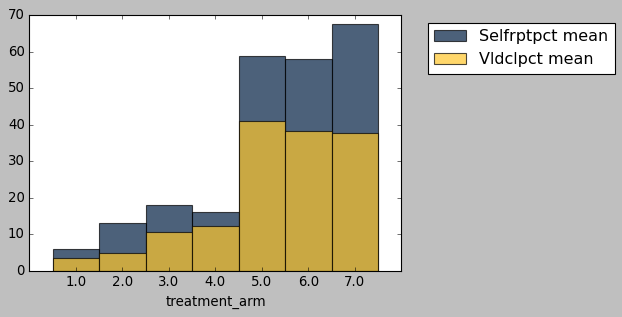

In [27]:
round2_means.bar('treatment_arm',make_array(2, 3)) 

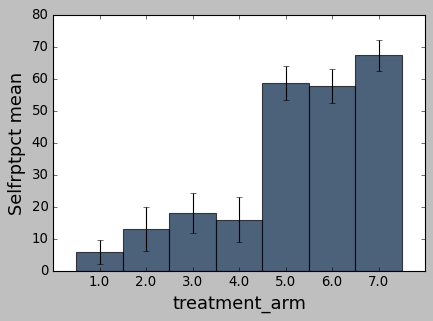

In [28]:
round2_means.bar('treatment_arm','Selfrptpct mean', yerr=round2_self_2se) 

In [29]:
#redo for Round = 3
WGPRd3 = WGP3rds_table.where("round",3).select("a1_cmpd_id",'treatment_arm','Selfrptpct', 'Vldclpct')
round3_means = WGPRd3.group('treatment_arm', np.mean)
round3_means_array = round3_means.column('Selfrptpct mean')
round3_stdev = WGPRd3.group('treatment_arm', np.std)
round3_num= WGPRd3.group('treatment_arm')
round3_self_stdev_array= round3_stdev.column('Selfrptpct std')
round3_self_num_array = round3_num.column('count')
round3_self_sqrtn_array = np.sqrt(round2_self_num_array)
round3_self_se=np.divide(round3_self_stdev_array,round3_self_sqrtn_array)
round3_self_2se = round3_self_se*2

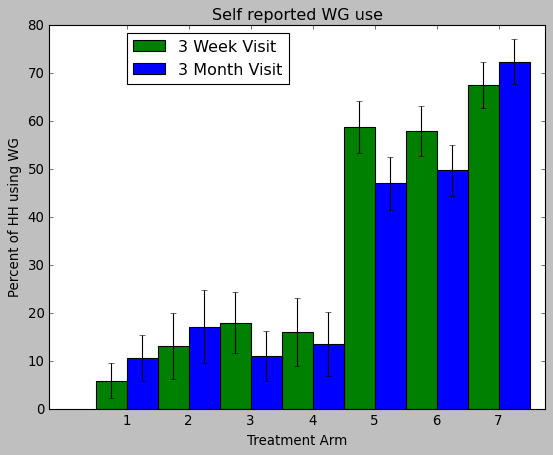

In [30]:
plt.style.use('classic')

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, round2_means_self_array, width, color='g', yerr=round2_self_2se)

rects2 = ax.bar(ind + width, round3_means_array, width, color='b', yerr=round3_self_2se)

# add some text for labels, title and axes ticks
ax.set_ylabel('Percent of HH using WG')
ax.set_title('Self reported WG use')
ax.set_xlabel('Treatment Arm')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1', '2', '3', '4', '5', '6','7'))

ax.legend((rects1[0], rects2[0])
          ,('3 Week Visit', '3 Month Visit')
          ,bbox_to_anchor=(0.5, 1.0))

plt.savefig("test.png")

plt.show()
